<a href="https://colab.research.google.com/github/SpandanDhru/SPD/blob/main/Spandan_LHC_Data_Analysis_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install uproot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 333.1/333.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.2/631.2 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.9 MB/s eta 0:00:00


In [ ]:
# LHC Data Analysis - Machine Learning
# Authors - Meer Abdullah, Spandan Dhru, Benjamin-Nicolas Enwesi
# We would like to thank CERN, The University of Maryland, College Park, and
# Dr. Shabnam Jabeen for giving us this research and development opportunity.

In [2]:
# Add 'HiggsAnalysis' folder in My Drive on Google Docs for this mount to work
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)
%cd ./gdrive/MyDrive/'HiggsAnalysis'/
#%cd ./gdrive/MyDrive/'HiggsAnalysis'/
# If you want to change the folder, change {HiggsAnalysis} to a different folder name in 'My Drive'
%ls

Mounted at /content/gdrive
/content/gdrive/MyDrive/HiggsAnalysis
'Higgs_data (1).h5'
 output_GluGluToZZTo4L_8TeV-gg2zz-pythia6.root
 output_VBF_HToZZTo4L_M-125_8TeV-powheg-pythia6.root


In [3]:
# Required imports
import uproot
import awkward as ak
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# **Setting up file paths and displaying what the data looks like**




In [4]:
# Displays file keys
file_path = "./output_GluGluToZZTo4L_8TeV-gg2zz-pythia6.root:HZZ4LeptonsAnalysisReduced"
file = uproot.open(file_path)
file.keys()

['f_run',
 'f_lumi',
 'f_event',
 'f_weight',
 'f_int_weight',
 'f_pu_weight',
 'f_eff_weight',
 'f_lept1_pt',
 'f_lept1_eta',
 'f_lept1_phi',
 'f_lept1_charge',
 'f_lept1_pfx',
 'f_lept1_sip',
 'f_lept2_pt',
 'f_lept2_eta',
 'f_lept2_phi',
 'f_lept2_charge',
 'f_lept2_pfx',
 'f_lept2_sip',
 'f_lept3_pt',
 'f_lept3_eta',
 'f_lept3_phi',
 'f_lept3_charge',
 'f_lept3_pfx',
 'f_lept3_sip',
 'f_lept4_pt',
 'f_lept4_eta',
 'f_lept4_phi',
 'f_lept4_charge',
 'f_lept4_pfx',
 'f_lept4_sip',
 'f_iso_max',
 'f_sip_max',
 'f_Z1mass',
 'f_Z2mass',
 'f_angle_costhetastar',
 'f_angle_costheta1',
 'f_angle_costheta2',
 'f_angle_phi',
 'f_angle_phistar1',
 'f_pt4l',
 'f_eta4l',
 'f_mass4l',
 'f_mass4lErr',
 'f_njets_pass',
 'f_deltajj',
 'f_massjj',
 'f_VD',
 'f_jet1_pt',
 'f_jet1_eta',
 'f_jet1_phi',
 'f_jet1_e',
 'f_jet2_pt',
 'f_jet2_eta',
 'f_jet2_phi',
 'f_jet2_e',
 'f_KD',
 'f_KD_k0minus',
 'f_KD_k0hplus',
 'f_KD_k1minus',
 'f_KD_k1plus',
 'f_KD_k2mplus_gg',
 'f_KD_k2mplus_qqbar']

In [5]:
# Displays event keys
events = uproot.open("./output_VBF_HToZZTo4L_M-125_8TeV-powheg-pythia6.root:HZZ4LeptonsAnalysisReduced") # Make sure this file is in the root directory of 'HiggsAnalysis'
events.keys()

['f_run',
 'f_lumi',
 'f_event',
 'f_weight',
 'f_int_weight',
 'f_pu_weight',
 'f_eff_weight',
 'f_lept1_pt',
 'f_lept1_eta',
 'f_lept1_phi',
 'f_lept1_charge',
 'f_lept1_pfx',
 'f_lept1_sip',
 'f_lept2_pt',
 'f_lept2_eta',
 'f_lept2_phi',
 'f_lept2_charge',
 'f_lept2_pfx',
 'f_lept2_sip',
 'f_lept3_pt',
 'f_lept3_eta',
 'f_lept3_phi',
 'f_lept3_charge',
 'f_lept3_pfx',
 'f_lept3_sip',
 'f_lept4_pt',
 'f_lept4_eta',
 'f_lept4_phi',
 'f_lept4_charge',
 'f_lept4_pfx',
 'f_lept4_sip',
 'f_iso_max',
 'f_sip_max',
 'f_Z1mass',
 'f_Z2mass',
 'f_angle_costhetastar',
 'f_angle_costheta1',
 'f_angle_costheta2',
 'f_angle_phi',
 'f_angle_phistar1',
 'f_pt4l',
 'f_eta4l',
 'f_mass4l',
 'f_mass4lErr',
 'f_njets_pass',
 'f_deltajj',
 'f_massjj',
 'f_VD',
 'f_jet1_pt',
 'f_jet1_eta',
 'f_jet1_phi',
 'f_jet1_e',
 'f_jet2_pt',
 'f_jet2_eta',
 'f_jet2_phi',
 'f_jet2_e',
 'f_KD',
 'f_KD_k0minus',
 'f_KD_k0hplus',
 'f_KD_k1minus',
 'f_KD_k1plus',
 'f_KD_k2mplus_gg',
 'f_KD_k2mplus_qqbar']

In [6]:
# displays hierarchical structure of "HZZ4LeptonsAnalysisReduced" TTree - showing list of all branches in the tree and its corresponding information
events.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
f_run                | int32_t                  | AsDtype('>i4')
f_lumi               | int32_t                  | AsDtype('>i4')
f_event              | int32_t                  | AsDtype('>i4')
f_weight             | float                    | AsDtype('>f4')
f_int_weight         | float                    | AsDtype('>f4')
f_pu_weight          | float                    | AsDtype('>f4')
f_eff_weight         | float                    | AsDtype('>f4')
f_lept1_pt           | float                    | AsDtype('>f4')
f_lept1_eta          | float                    | AsDtype('>f4')
f_lept1_phi          | float                    | AsDtype('>f4')
f_lept1_charge       | float                    | AsDtype('>f4')
f_lept1_pfx          | float                    | AsDtype('>f4')
f_lept1_sip          | float                    | AsDtype(

In [8]:
# # Open signal and background ROOT files and select features to use as input data
# signal = uproot.open("./output_VBF_HToZZTo4L_M-125_8TeV-powheg-pythia6.root:HZZ4LeptonsAnalysisReduced")
# background = uproot.open("./output_GluGluToZZTo4L_8TeV-gg2zz-pythia6.root:HZZ4LeptonsAnalysisReduced")
# labels = ['f_Z1mass', 'f_Z2mass', 'f_pt4l', 'f_eta4l', 'f_mass4l']

# # Count number of signal and background events and create an array of targets for each event
# n_signal = len(signal['f_Z1mass'].array(library="np"))
# n_background = len(background['f_Z1mass'].array(library="np"))
# lhc_data = [np.append(np.ones(n_signal), np.zeros(n_background))]

# # Combine the signal and background arrays for each selected feature and create the full data array
# for label in labels:
#     combined = np.append(signal[label].array(library='np'), background[label].array(library='np'))
#     lhc_data = np.append(lhc_data, [combined], axis=0)

# # Transpose the data array to match the format of the previous code and split the input and target data into separate arrays
# lhc_data = np.transpose(lhc_data)
# inputs = lhc_data[:, 1:]
# targets = lhc_data[:, 0]

#Improved efficency of previous code by orgainzing in a 2D-array using np.vstack

import uproot
import numpy as np

# Open signal and background ROOT files and select features to use as input data
signal = uproot.open("./output_VBF_HToZZTo4L_M-125_8TeV-powheg-pythia6.root:HZZ4LeptonsAnalysisReduced")
background = uproot.open("./output_GluGluToZZTo4L_8TeV-gg2zz-pythia6.root:HZZ4LeptonsAnalysisReduced")
#adding a few more labels to be trained on - 'f_eff_weight'
labels = ['f_lept3_pt', 'f_lept4_pt', 'f_Z1mass', 'f_angle_costheta2', 'f_pt4l', 'f_eta4l', 'f_jet1_pt', 'f_jet1_e']

# Count number of signal and background events and create an array of targets for each event
n_signal = len(signal[labels[0]].array(library="np"))
n_background = len(background[labels[0]].array(library="np"))
lhc_data = np.append(np.ones(n_signal), np.zeros(n_background))

# Combine the signal and background arrays for each selected feature and create the full data array
for label in labels:
    combined = np.append(signal[label].array(library='np'), background[label].array(library='np'))
    lhc_data = np.vstack((lhc_data, combined))

# Transpose the data array to match the format of the previous code and split the input and target data into separate arrays
lhc_data = np.transpose(lhc_data)
inputs = lhc_data[:, 1:]
targets = lhc_data[:, 0]

In [ ]:
targets.shape

(31162,)

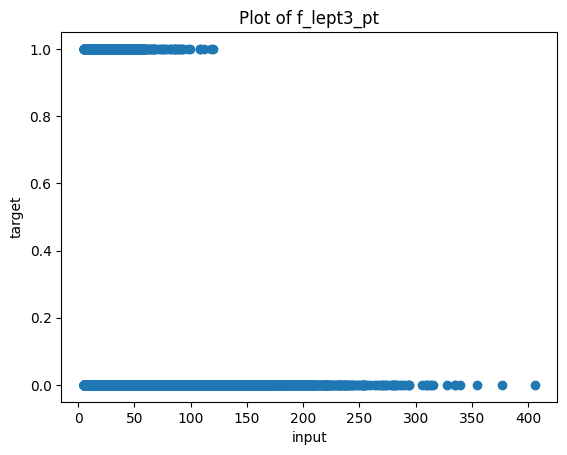

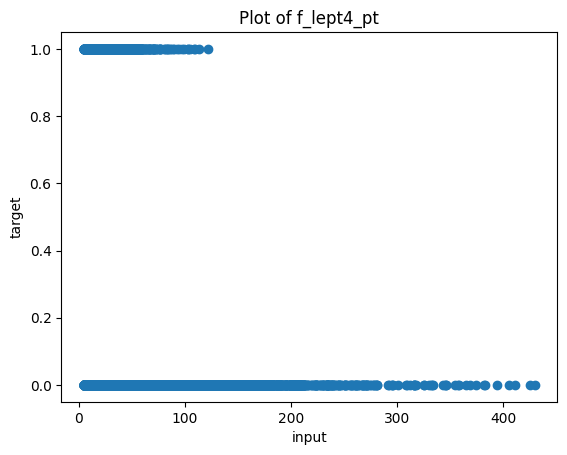

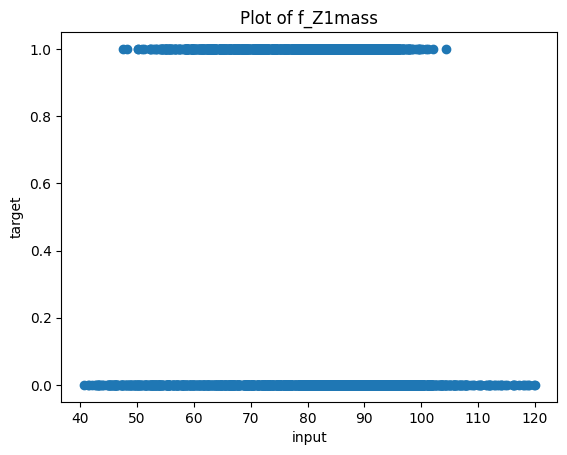

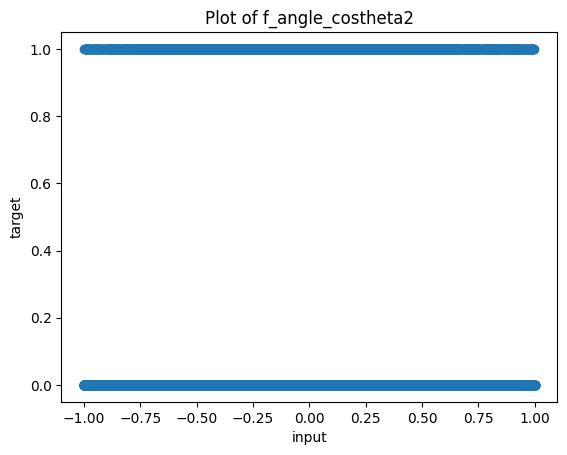

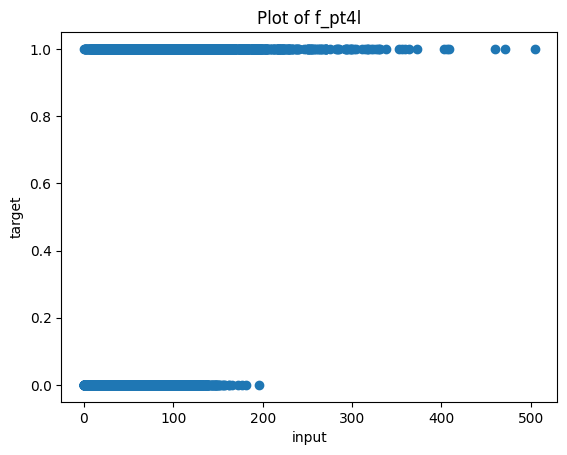

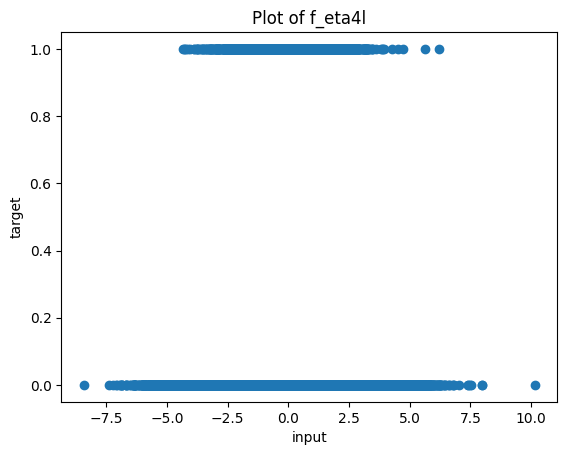

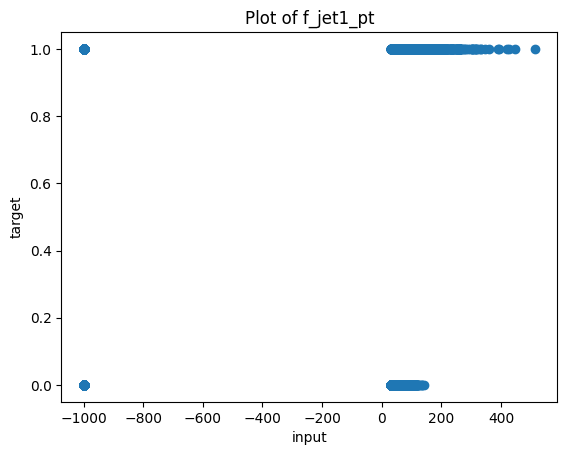

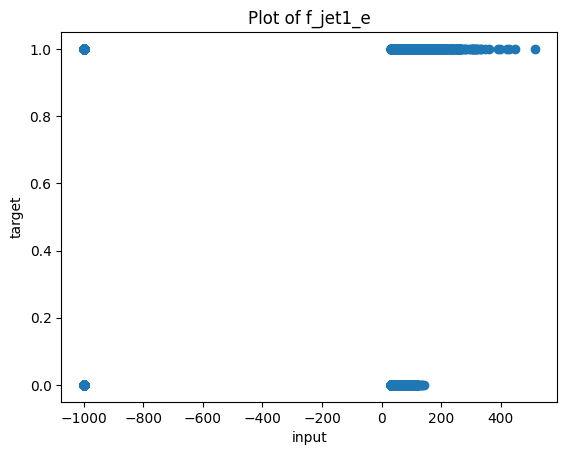

In [9]:
import matplotlib.pyplot as plt

for i in range(len(labels)):
    plt.figure()
    plt.scatter(inputs[:, i], targets)
    plt.title("Plot of %s" % labels[i])
    plt.xlabel("input")
    plt.ylabel("target")


# **Preparing data to be trained**

In [10]:
# Split input and target data into training and validation sets using a test size of 20%
inputs_train, inputs_val, targets_train, targets_val = train_test_split(inputs, targets, test_size=0.2, random_state=42)

# Use StandardScaler from scikit-learn to scale the training input data
preprocessing_input = StandardScaler()
scaled_inputs_train = preprocessing_input.fit_transform(inputs_train)

# Use the same StandardScaler instance to transform the validation input data
# so that it's on the same scale as the training data
inputs_train_for_model_fit = preprocessing_input.transform(inputs_train)
scaled_inputs_test = preprocessing_input.transform(inputs_val)

# **Shallow Neural Network Model**

This code utilizes the Keras library to build, compile, and train a **shallow neural network** for binary classification. The network has the following structure:

1. Two dense layers:
*   First layer: 50 units with a tanh activation function.
*   Second layer: A single output unit with a sigmoid activation function.

2. The training process:
*   Optimizer: Adam with a learning rate of 0.001.
*   Loss function: Binary cross-entropy.
*   Evaluation metric: Accuracy.

3. Callbacks used during training:
*   EarlyStopping: Stops training if the validation loss doesn't improve for a specified number of epochs.
*   ReduceLROnPlateau: Reduces the learning rate when the validation loss plateaus, with a specified reduction factor and minimum learning rate.

4. Model performance evaluation:
*   The model is evaluated on a test set, and the loss and accuracy are displayed.

Summary:
This code constructs and trains a shallow neural network using Keras for binary classification tasks. It features a two-layer structure, various training configurations, and callbacks for early stopping and learning rate adjustment. The model's performance is evaluated on a test set, providing loss and accuracy as output metrics.

In [11]:
# initializing shallow neural network
myShallowModel = Sequential()
# change 'units' to 250, and activation from 'tanh' to 'relu' for optimal results for this shallow network :)
myShallowModel.add(Dense(units=50, activation='tanh', kernel_regularizer=l2(0.001), input_dim=scaled_inputs_train.shape[1]))
myShallowModel.add(Dense(units=1, activation='sigmoid'))

# compiling shallow neural network
myShallowModel.compile(optimizer=Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [12]:
# Create an instance of EarlyStopping callback to stop training if val_loss doesn't improve after 10 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Create an instance of ReduceLROnPlateau callback to reduce the learning rate by a factor of 0.2
# if val_loss doesn't improve after 5 epochs, with a minimum learning rate of 1e-6
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

In [13]:
# Train the model and store it in shallow_history (will use this later for plots)
shallow_history = myShallowModel.fit(inputs_train_for_model_fit,
            targets_train,
            epochs=50, # change epochs 100 for optimal results :)
            batch_size=256, #chance batch_size to 256 for optimal results :)
            validation_split=0.2,
            callbacks=[early_stopping, reduce_lr])

loss, accuracy = myShallowModel.evaluate(scaled_inputs_test, targets_val)
print('Shallow NN Test loss:', loss)
print('Shallow NN Test accuracy:', accuracy)

Epoch 1/50
78/78 [==============================] - 3s 19ms/step - loss: 0.5415 - accuracy: 0.7786 - val_loss: 0.3824 - val_accuracy: 0.9258 - lr: 0.0010
Epoch 2/50
78/78 [==============================] - 1s 8ms/step - loss: 0.2909 - accuracy: 0.9411 - val_loss: 0.2122 - val_accuracy: 0.9595 - lr: 0.0010
Epoch 3/50
78/78 [==============================] - 1s 14ms/step - loss: 0.1765 - accuracy: 0.9603 - val_loss: 0.1440 - val_accuracy: 0.9657 - lr: 0.0010
Epoch 4/50
78/78 [==============================] - 1s 18ms/step - loss: 0.1314 - accuracy: 0.9646 - val_loss: 0.1149 - val_accuracy: 0.9719 - lr: 0.0010
Epoch 5/50
78/78 [==============================] - 1s 14ms/step - loss: 0.1105 - accuracy: 0.9682 - val_loss: 0.0996 - val_accuracy: 0.9711 - lr: 0.0010
Epoch 6/50
78/78 [==============================] - 0s 5ms/step - loss: 0.0989 - accuracy: 0.9692 - val_loss: 0.0907 - val_accuracy: 0.9733 - lr: 0.0010
Epoch 7/50
78/78 [==============================] - 0s 5ms/step - loss: 0.0916

# **Deep Neural Network Model**

This code builds, compiles, and trains a **deep neural network** for binary classification using the Keras library. The network has the following structure:

1. Four dense layers:
*   First layer: 50 units with a tanh activation function, L2 regularization, and input dimension based on the training data.
*   Second layer: Dropout layer with a rate of 0.4 to prevent overfitting.
*   Third layer: 50 units with a tanh activation function and L2 regularization.
*   Fourth layer: Dropout layer with a rate of 0.4.
*   Fifth layer: 50 units with a relu activation function and L2 regularization.
*   Sixth layer: Dropout layer with a rate of 0.4.
*   Seventh layer: A single output unit with a sigmoid activation function.

2. Training process:
*   EarlyStopping callback: Stops training if the validation loss doesn't improve after 10 epochs.
*   ReduceLROnPlateau callback: Reduces the learning rate by a factor of 0.2 if the validation loss doesn't improve after 5 epochs, with a minimum learning rate of 1e-6.
*   Model training: 50 epochs and a batch size of 100,000, with 20% of the data used for validation.

3. Model performance evaluation:

*   The model is evaluated on a test set, and the loss and accuracy are displayed.

Summary:
This code constructs and trains a deep neural network using Keras for binary classification tasks, featuring a four-layer structure with dropout layers, training configurations, and callbacks for early stopping and learning rate adjustment. The model's performance is evaluated on a test set, providing loss and accuracy as output metrics.

In [14]:
# initializing deep neural network
myDeepModel = Sequential()
# set units to 250 and activation to 'relu' for optimal results :)
myDeepModel.add(Dense(units=50, activation='tanh', kernel_regularizer=l2(0.001), input_dim=scaled_inputs_train.shape[1]))
myDeepModel.add(Dropout(0.4))
myDeepModel.add(Dense(units=50, activation='tanh', kernel_regularizer=l2(0.001)))
myDeepModel.add(Dropout(0.4))
myDeepModel.add(Dense(units=50, activation='relu', kernel_regularizer=l2(0.001)))
myDeepModel.add(Dropout(0.4))
myDeepModel.add(Dense(units=1, activation='sigmoid'))

myDeepModel.compile(optimizer=Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [15]:
# Create an instance of EarlyStopping callback to stop training if val_loss doesn't improve after 10 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Create an instance of ReduceLROnPlateau callback to reduce the learning rate by a factor of 0.2
# if val_loss doesn't improve after 5 epochs, with a minimum learning rate of 1e-6
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

In [16]:
deep_history = myDeepModel.fit(inputs_train_for_model_fit,
            targets_train,
            epochs=50, # change epochs to 100 for optimal results :)
            batch_size=256, # change batch size to 256 for optimal results :)
            validation_split=0.2,
            callbacks=[early_stopping, reduce_lr])

loss, accuracy = myDeepModel.evaluate(scaled_inputs_test, targets_val)
print('Deep NN Test loss:', loss)
print('Deep NN Test accuracy:', accuracy)

Epoch 1/50
78/78 [==============================] - 2s 8ms/step - loss: 0.4243 - accuracy: 0.8808 - val_loss: 0.2209 - val_accuracy: 0.9657 - lr: 0.0010
Epoch 2/50
78/78 [==============================] - 0s 6ms/step - loss: 0.2353 - accuracy: 0.9553 - val_loss: 0.1777 - val_accuracy: 0.9729 - lr: 0.0010
Epoch 3/50
78/78 [==============================] - 1s 9ms/step - loss: 0.1920 - accuracy: 0.9628 - val_loss: 0.1581 - val_accuracy: 0.9753 - lr: 0.0010
Epoch 4/50
78/78 [==============================] - 1s 7ms/step - loss: 0.1743 - accuracy: 0.9646 - val_loss: 0.1442 - val_accuracy: 0.9729 - lr: 0.0010
Epoch 5/50
78/78 [==============================] - 1s 7ms/step - loss: 0.1551 - accuracy: 0.9667 - val_loss: 0.1307 - val_accuracy: 0.9745 - lr: 0.0010
Epoch 6/50
78/78 [==============================] - 1s 7ms/step - loss: 0.1410 - accuracy: 0.9689 - val_loss: 0.1201 - val_accuracy: 0.9751 - lr: 0.0010
Epoch 7/50
78/78 [==============================] - 1s 8ms/step - loss: 0.1318 - a

# **Training vs Validation, Discriminator, ROC/Efficiency Curve, and Confusion Matrix Plots**

This code generates visualizations to evaluate and compare the performance of the shallow and deep neural networks. The following plots are created for both models:

1. Training vs Validation Accuracy and Loss: These plots display the training and validation accuracy and loss during the training process, providing insight into how well the models are learning and generalizing.

2. Discriminator Plot: These plots show the distributions of the predicted probabilities for signal and background events, illustrating the models' ability to discriminate between the two classes.

3. ROC Curve: The Receiver Operating Characteristic (ROC) curve plots the true positive rate against the false positive rate at various threshold settings, demonstrating the trade-off between sensitivity and specificity. The area under the ROC curve (AUC) is also computed as a performance metric.

4. Confusion Matrix: These plots visualize the number of true positive, true negative, false positive, and false negative predictions made by the models, providing a clear representation of their classification performance.

Summary:
This code generates a series of visualizations to evaluate and compare the performance of the shallow and deep neural networks for binary classification tasks, covering aspects such as accuracy, loss, discrimination, and confusion matrix.

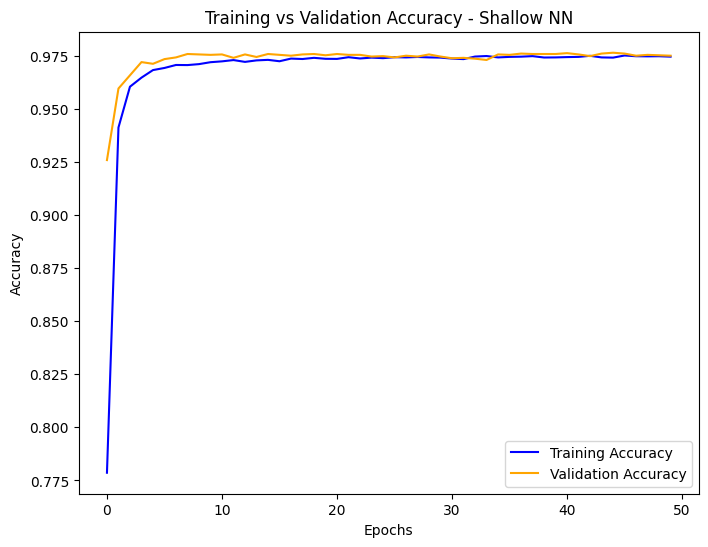

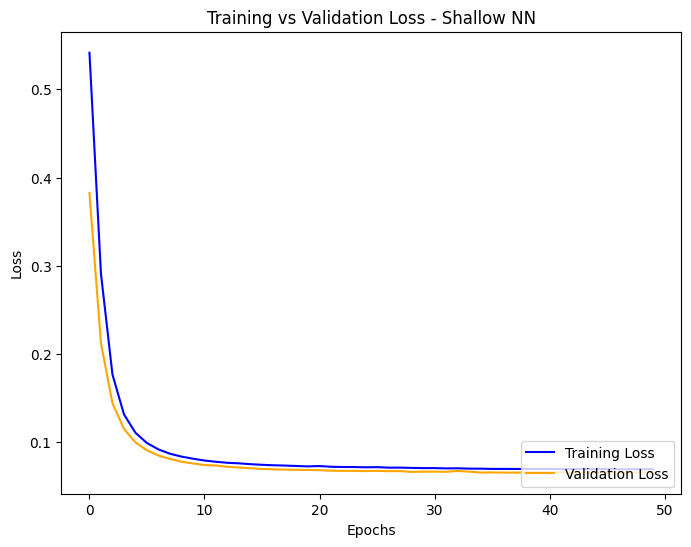

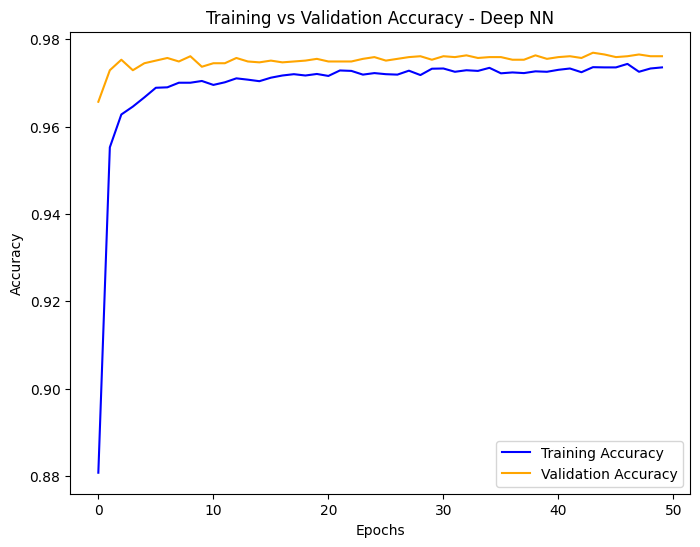

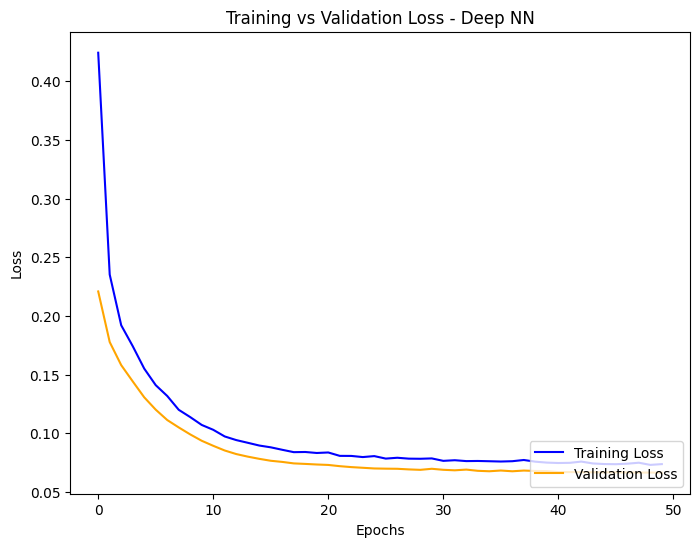

In [17]:
import matplotlib.pyplot as plt

# training vs validation (accuracy and loss) plot function
def plot_accuracy_and_loss(history, model_name):
    plt.figure(figsize=(8, 6))

    # training accuracy of model_name
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
    plt.title(f'Training vs Validation Accuracy - {model_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc="lower right")
    plt.show()

    plt.figure(figsize=(8, 6))

    # training loss of model_name
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title(f'Training vs Validation Loss - {model_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc="lower right")
    plt.show()

# plot graphs for myShallowModel
plot_accuracy_and_loss(shallow_history, 'Shallow NN')
# plot graphs for myDeepModel
plot_accuracy_and_loss(deep_history, 'Deep NN')

195/195 [==============================] - 1s 2ms/step


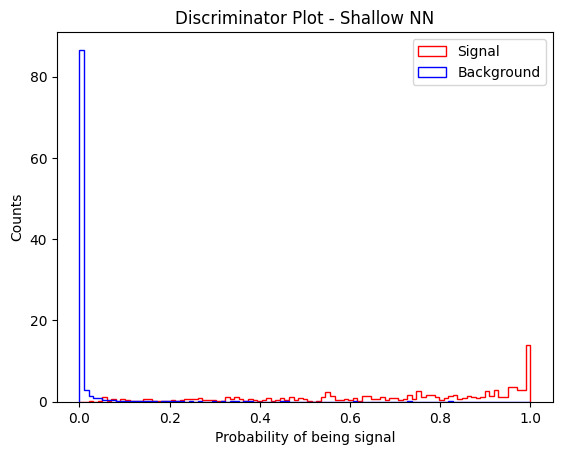

195/195 [==============================] - 1s 2ms/step


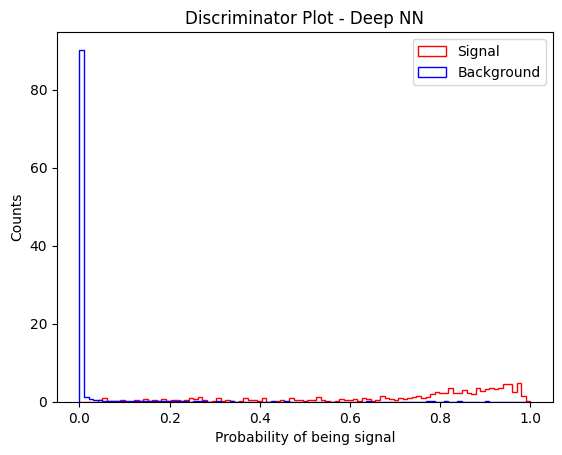

In [18]:
# discriminator (background vs signal) plot function
def plot_discriminator(model, title):
    # Use the model to predict the probabilities of each event being signal
    probs = model.predict(scaled_inputs_test)

    # Separate the probabilities for signal and background events
    sig_probs = probs[targets_val == 1]
    bkg_probs = probs[targets_val == 0]

    # Define the binning for the histogram
    bins = np.linspace(0, 1, 100)

    # Create the histogram
    plt.hist(sig_probs, bins=bins, histtype='step', color='red', label='Signal', density=True)
    plt.hist(bkg_probs, bins=bins, histtype='step', color='blue', label='Background', density=True)

    # Add labels and legend
    plt.xlabel('Probability of being signal')
    plt.ylabel('Counts')
    plt.title(f'Discriminator Plot - {title}')
    plt.legend()

    # Show the plot
    plt.show()

# Discriminator plot for shallow model
plot_discriminator(myShallowModel, 'Shallow NN')
# Discriminator plot for deep model
plot_discriminator(myDeepModel, 'Deep NN')

195/195 [==============================] - 0s 2ms/step


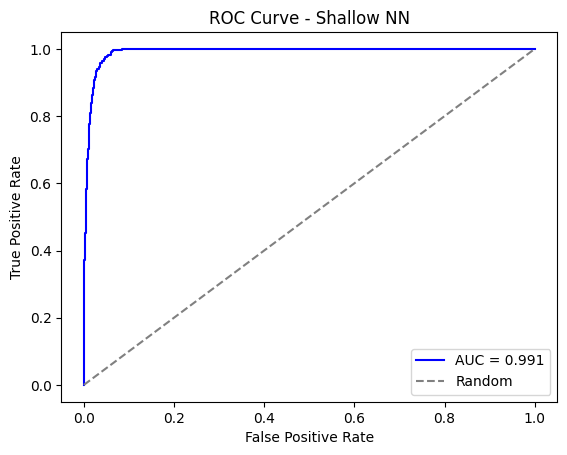

195/195 [==============================] - 0s 2ms/step


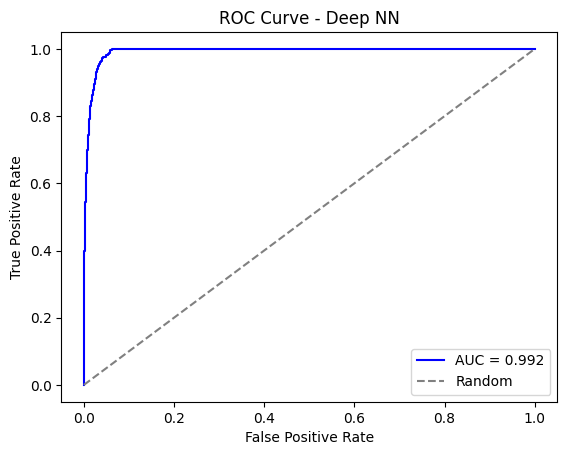

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

def plot_roc_curve(model, inputs, targets, title):
    # Compute model predictions
    model_preds = model.predict(inputs)

    # Compute the false positive rate and true positive rate for different thresholds
    fpr, tpr, thresholds = roc_curve(targets, model.predict(inputs))

    # Compute the area under the ROC curve
    auc = roc_auc_score(targets, model_preds)

    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.3f}')

    # Plot the diagonal line representing random classification
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

    # Add labels and legend
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()

    # Show the plot
    plt.show()

# Example usage:
plot_roc_curve(myShallowModel, scaled_inputs_test, targets_val, f'ROC Curve - Shallow NN')
plot_roc_curve(myDeepModel, scaled_inputs_test, targets_val, f'ROC Curve - Deep NN')

195/195 [==============================] - 0s 1ms/step


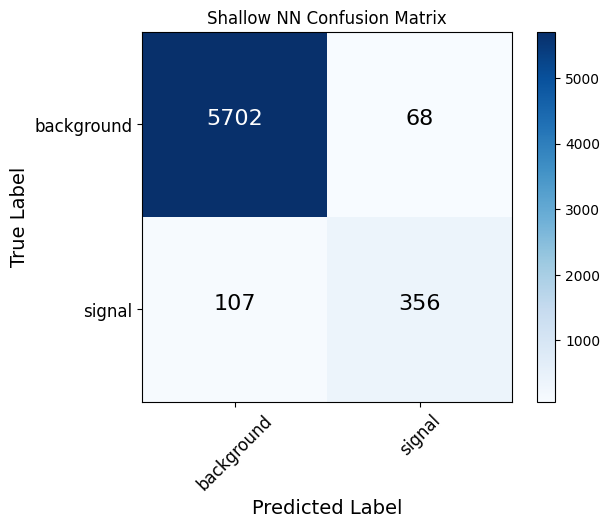

195/195 [==============================] - 1s 3ms/step


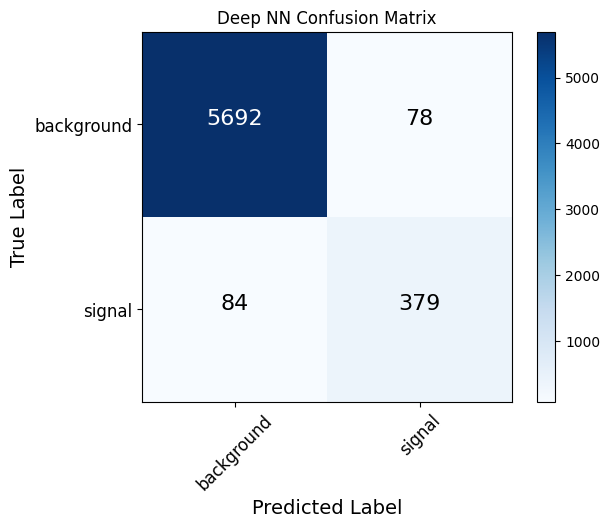

In [20]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix plot function
def plot_confusion_matrix(model, inputs_test, targets_test, title):
    # Convert probabilities to binary predictions
    y_pred = np.round(model.predict(inputs_test))

    # Create confusion matrix
    cm = confusion_matrix(targets_test, y_pred)

    # Plot confusion matrix
    plt.imshow(cm, cmap=plt.cm.Blues, interpolation='nearest')
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(targets_test)))
    plt.xticks(tick_marks, ['background', 'signal'], rotation=45, fontsize=12)
    plt.yticks(tick_marks, ['background', 'signal'], fontsize=12)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.title(title)

    # Add numbers on top of each square
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize=16)

    plt.show()

# Confusion matrix plot for shallow model
plot_confusion_matrix(myShallowModel, scaled_inputs_test, targets_val, 'Shallow NN Confusion Matrix')
# Confusion matrix plot for deep model
plot_confusion_matrix(myDeepModel, scaled_inputs_test, targets_val, 'Deep NN Confusion Matrix')